<a href="https://colab.research.google.com/github/hudanjhh/SECB4313/blob/main/BMS_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

In [3]:
data_path = '/content/drive/My Drive/Bio Modelling & Simulation/Breast Cancer for Group Project/'

In [4]:
features = pd.read_csv(data_path + 'SVMRFE.csv')
target = pd.read_csv(data_path + 'omic_class.csv')

In [5]:
X = features.iloc[:,1:-1]
y = target.iloc[:,-1]

In [6]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 12000)))  # Input shape: 12000 features
model.add(Dense(units=6, activation='softmax'))  # Output layer for 6 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
17/17 [==============================] - 6s 165ms/step - loss: 1.4045 - accuracy: 0.5131 - val_loss: 1.3177 - val_accuracy: 0.5259
Epoch 2/10
17/17 [==============================] - 1s 85ms/step - loss: 1.2443 - accuracy: 0.5261 - val_loss: 1.2846 - val_accuracy: 0.5259
Epoch 3/10
17/17 [==============================] - 1s 85ms/step - loss: 1.2110 - accuracy: 0.5261 - val_loss: 1.2571 - val_accuracy: 0.5259
Epoch 4/10
17/17 [==============================] - 1s 77ms/step - loss: 1.1910 - accuracy: 0.5261 - val_loss: 1.2481 - val_accuracy: 0.5259
Epoch 5/10
17/17 [==============================] - 1s 48ms/step - loss: 1.1812 - accuracy: 0.5261 - val_loss: 1.2379 - val_accuracy: 0.5259
Epoch 6/10
17/17 [==============================] - 1s 50ms/step - loss: 1.1699 - accuracy: 0.5261 - val_loss: 1.2249 - val_accuracy: 0.5259
Epoch 7/10
17/17 [==============================] - 1s 49ms/step - loss: 1.1630 - accuracy: 0.5261 - val_loss: 1.2211 - val_accuracy: 0.5259
Epoch 8/10
1

In [7]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

5/5 [==============================] - 1s 8ms/step


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 16ms/step - loss: 1.1925 - accuracy: 0.5259
Validation accuracy: 0.5259


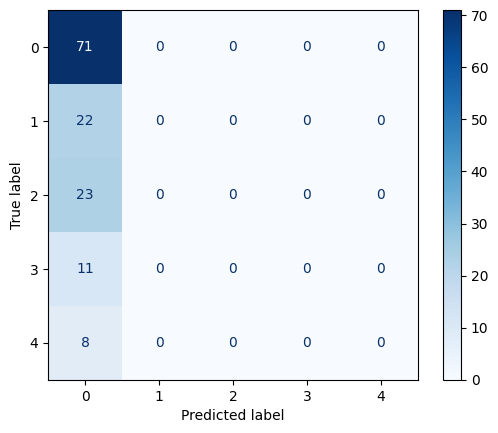

In [12]:
# Construct confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

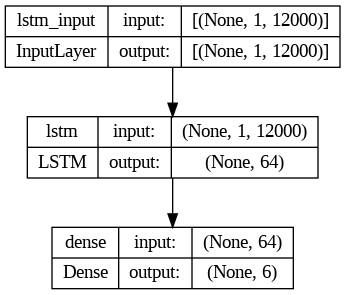

In [15]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

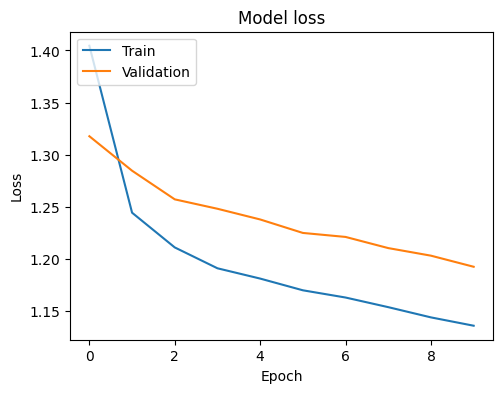

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

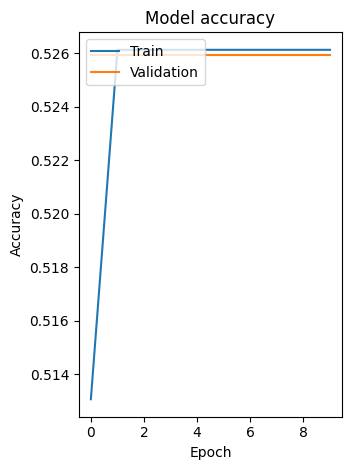

In [17]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()